# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 07/15/2022
* Student Name: Anne Louise Seekford
* Student Net ID: bng3be
* This URL: https://github.com/alseekford/MonteCarloSimulation_DS5100/blob/main/final-project-submission.ipynb
* GitHub Repo URL: https://github.com/alseekford/MonteCarloSimulation_DS5100

# The Monte Carlo Module

In [2]:
import pandas as pd
import numpy as np

class Die: 
    """
    PURPOSE: Creates a die with n Faces and w Weights. Can be rolled to select a face

    METHODS: 
    __init__
    change_weight
    roll_die
    show_die
    """
    def __init__(self, faces):
        """
        PURPOSE: Initializes the Die class

        INPUTS: 
        faces      arr

        OUTPUTS: No outputs
        """
        self.faces = faces
        self.weights = []
        for i in range(len(self.faces)):
            self.weights.append(1.0)
        self._dice = pd.DataFrame(data = {'Faces':self.faces, 'Weights':self.weights})
    
    def change_weight(self, face_value, new_weight):
        """
        PURPOSE: Changes the weight value of a designated face.
        
        INPUTS:
        face_value   str
        new_weight   float

        OUTPUTS: Raises an Exception if the new weight is not a float or int value.
        """
        # Check to see if the face is valid
        if face_value in self._dice['Faces'].values:
            # Check to see if the weight is valid - and change if applicable
            if isinstance(new_weight, int):
                new_weight = float(new_weight)
                # Replace 
                self._dice.loc[self._dice.Faces == face_value, 'Weights'] = new_weight
            elif isinstance(new_weight, float):
                new_weight = new_weight
                self._dice.loc[self._dice.Faces == face_value, 'Weights'] = new_weight
            else:
                raise Exception('Please try again. New weight must be a float value.')
        else:
            print('Sorry, this face value does not exist. Try again.')

    
    def roll_die(self, n_rolls=1):
        """
        PURPOSE: Rolls the die n times and returns the result.
            
        INPUTS: 
        n_rolls     int; default=1

        OUTPUTS: Returns a list of the results.
        """
        results = []
        for i in range(n_rolls):
            result = self._dice.Faces.sample(weights=self._dice.Weights).values[0]
            results.append(result)
        return results
    
    def show_die(self):
        """
        PURPOSE: Prints the current die and corresponding weights.

        INPUTS: No inputs

        OUTPUTS: Returns the current die as a DataFrame
        """
        return pd.DataFrame(self._dice)
    
    
    
    
class Game(): 
    """
    PURPOSE: A game consists of rolling one or more dice of the same kind one or more times.

    METHODS: 
    __init__
    play
    show_results
    """
    def __init__(self, my_dice):
        """
        PURPOSE: Initializes a list of already-instantiated Die objects.

        INPUTS: 
        my_dice     arr

        OUTPUTS: No outputs
        """
        # self._dice takes an array
        self.dice = my_dice
        
        # Instantiate the DataFrame of the results for all die
        self._results = pd.DataFrame()

        
    def play(self, n_rolls):
        """
        PURPOSE: Rolls each die n_rolls number of times and returns the result of the most recent play.
        
        INPUTS:
        n_rolls   int

        OUTPUTS: No outputs
        """
    
        self.rolls = n_rolls

        roll_die = Game.roll_die

        for current_die in self.dice:
            row_result = current_die.roll_die(n_rolls)
            self._results[self.dice.index(current_die)] = row_result
            self._results.index.name = 'Roll_Number'
            self._results = self._results.rename_axis('Dice', axis='columns')
        
    
    def show_results(self, n_or_w= 'wide'):
        """
        PURPOSE: Shows you, as the user, the results of the most recent play. 
        
        INPUTS:
        n_or_w     str; must be either 'narrow' or 'wide'
        
        OUTPUTS: A dataframe with results - in either wide or narrow form.
        """
        # Regardless of narrow or wide, the index will be Roll Number
        self._results.index.name = 'Roll_Number'
        
        if n_or_w == 'wide':
            # 1 index: roll number
            # Columns: each die number
            return self._results
            
        elif n_or_w == 'narrow':
            # 2 column index: die #, roll number
            # Column: face rolled
            # narrow_dice = self._results.reset_index().set_index(['Dice','Roll_Number'])
            narrow_dice = self._results.T.stack().to_frame()
            return narrow_dice
        
        else: 
            # Raise an exception if the option is invalid
            raise ValueError('Invalid. You must denote either "narrow" or "wide". Please try again.')
            
            
class Analyzer(): 
    """
    PURPOSE: Takes the results of a single game and computes various descriptive statistical properties about it. 
    
    METHODS: 
    __init__
    faces_per_roll
    jackpot
    combo
    """
    def __init__(self, my_game):
        """
        PURPOSE: Initializes the Game.show_results and Die.show_die

        INPUTS: A game object

        OUTPUTS: No outputs
        """
        self.my_game = my_game
        
        # Infer datatype
        #self.data_type = type(self.my_game.iloc[:,0][0]) is str
        
        self.game_result = self.my_game.show_results() #Raf code
        
        
    
    def faces_per_roll(self):
        """
        PURPOSE: The number of times a given face appeared in each roll. 
                 Ex. if a roll of five dice has all sixes, then the counts 
                 for this roll would be 6 for the face value '6' and 0 for the other faces
        
        INPUTS: No inputs

        OUTPUTS: Returns a Series of the Face values
        """
        face_vals = self.my_game.show_results().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        return face_vals
        
    
    def jackpot(self):
        """
        PURPOSE: How many times a roll resulted in all faces being the same
                 Ex. all one for a six-sided die.

        INPUTS: No inputs

        OUTPUTS: Returns the number of Jackpots.
        """
        self.num_jackpots = 0 #Initialize as 0
        
        # Jackpot DataFrame ; Roll_Number as index, filled with Boolean values, then convert
        self.bool_df = self.game_result.eq(self.game_result.iloc[:,0], axis=0).all(1)
        self.jackpot_df = self.bool_df[self.bool_df]
        
        # Return the number of jackpots - AKA how many rows
        return len(self.jackpot_df)
        
    def combo(self):
        """
        PURPOSE: How many combination types of faces were rolled and their counts

        INPUTS: No inputs.

        OUTPUTS: Returns a DataFrame of Combos
        """
        self.combos = self.game_result.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('n') #Raf code
        return self.combos           
        

# Test Module

In [3]:
import pandas as pd
import numpy as np
import unittest

# Import montecarlo.py classes
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer


class MonteCarloTestSuite(unittest.TestCase):
    """
    TESTS FOR DIE CLASS (5)
    """
    
    def test_1__init__(self):
        """
        PURPOSE: to ensure initialization of all weights as 1
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """
        die1 = Die(['clubs', 'hearts', 'spades', 'diamonds'])
        self.assertTrue(die1._dice.iloc[0,0] == 1)
    

    def test_2_change_weight_successfully(self):
        """
        PURPOSE: test change_weight method with a valid weight value (i.e. an integer) by weight of 'spades' changed to 4
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """
        die2 = Die(['clubs', 'hearts', 'spades', 'diamonds'])
        die2.change_weight('spades', 4)
        new_weights = [1, 1, 4, 1]
        
        # Check
        self.assertEqual(die2.Weights, new_weights)
    
    
    def test_3_change_weight_to_fail(self):
        """
        PURPOSE: test change_weight method with a valid weight value (i.e. a string) by weight of 'clubs' changed to 'putter'
        
        INPUTS: no inputs
        
        OUTPUTS: passes test that raises an exception "Please try again. New weight must be a float value." indicating an invalid argument.
        """
        with self.assertRaises(Exception):
            die3 = Die(['clubs', 'hearts', 'spades', 'diamonds'])
            die3.change_weight('clubs', 'driver')
    
    
    def test_4_roll_die(self):
        """
        PURPOSE: returns the length of results that match the n_rolls argument
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """
        die4 = Die(['maybe', 'yes', '100% no', 'try again'])
        rolly = die4.roll_die(n_rolls=4)
        
        # Check
        self.assertEqual(len(rolly), 4)
    
    
    def test_5_show_die(self):
        """
        PURPOSE: validates the DataFrame returned by show_die is correct
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """
        die5 = Die(['one', 'one twice', 'one again'])
        expected = pd.DataFrame({'Faces':['one', 'one twice', 'one again'], 'Weights':[1, 1, 1]})
        
        # Check
        self.assertEqual(die5.show_die(), expected)
    
    
    """
    TESTS FOR GAME CLASS (5)
    """
    
    def test_6__init__(self):
        """
        PURPOSE: to ensure initialization
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """
        die6 = [Die(['1', '2', '3']), Die(['4', '5', '6'])]
        my_game = Game(die6)
        
        # Check
        self.assertTrue(isinstance(my_game, Game))
    
    
    def test_7_play(self):
        """
        PURPOSE: checks the shape of results that match the n_rolls argument for each Die provided
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """
        die7 = [Die(['a', 'b', 'c']), Die(['d', 'e', 'f'])]
        my_game = Game(die7)
        my_game.play(7)
        die7_results = my_game.show_results()
        expected = (7, 2)
        
        # Check
        self.assertEqual(die7_results.shape, expected)
    

    def test_8_wide_results(self):
        """
        PURPOSE: ensure the DataFrame will return 'wide' by default by matching the shape
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        die8 = [Die(['a', 'b', 'c']), Die(['d', 'e', 'f']), Die(['g', 'h', 'i'])]
        my_game = Game(die8)
        my_game.play(8)
        die8_results = my_game.show_results()
        expected = (8, 3)
        
        # Check
        self.assertEqual(die8_results.shape, expected)
        
    
    def test_9_narrow_results(self):
        """
        PURPOSE: ensure the DataFrame will return 'narrow' when passing the parameter, by matching the shape
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        die9 = [Die(['do', 're', 'mi']), Die(['fa', 'so', 'la'])]
        my_game = Game(die9)
        my_game.play(9)
        die9_results = my_game.show_results()
        expected = (18, 1)
        
        # Check
        self.assertEqual(die9_results.shape, expected)
    
    
    def test_10_fail_results(self):
        """
        PURPOSE: to ensure an exception is raised when a value other than 'narrow' or 'wide' is passed.
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        with self.assertRaises(Exception):
            die10 = [Die(['do', 're', 'mi']), Die(['fa', 'so', 'la'])]
            my_game = Game(die10)
            my_game.play(10)
            my_game.show_results(n_or_w = 'skinny queen')
    
    """
    TESTS FOR ANALYZER CLASS (4)
    """
    
    def test_11__init__(self):
        """
        PURPOSE: to ensure initialization
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        die11 = [Die(['am', 'i', 'init']), Die(['am', 'i', 'init'])]
        my_game = Game(die11)
        my_game.play(11)
        my_ana = Analyzer(my_game)
        
        # Check
        self.assertTrue(isinstance(my_ana.my_game), Game)
    

    def test_12_faces_per_roll(self):
        """
        PURPOSE: to ensure the number of columns matches the number of faces on the Die
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        die12 = [Die(['do', 're', 'mi']), Die(['fa', 'so', 'la'])]
        my_game = Game(die12)
        my_game.play(12)
        my_ana = Analyzer(my_game)
        counts = my_ana.faces_per_roll()
        expected = (12, 3)
        
        # Check
        self.assertEqual(counts.shape, expected)
    

    def test_13_jackpot(self):
        """
        PURPOSE: returns the proper number of times a roll resulted in all faces being the same as an INTEGER
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        die13 = [Die(['king', 'jack', 'ace']), Die(['two', 'joker', 'ace']), Die(['king', 'queen', 'two']), Die(['queen', 'ace', 'two'])]
        my_game = Game(die13)
        my_game.play(13)
        my_ana = Analyzer(my_game)
        jack = my_ana.jackpot()
        
        # Check
        self.assertTrue(type(jack) == int)
    

    def test_14_combo(self):
        """
        PURPOSE: the combos should be multi-indexed, so we can check by ensuring there is only one column. 
        
        INPUTS: no inputs
        
        OUTPUTS: passes test
        """        
        die14 = [Die(['ace', 'jack', 'one']), Die(['two', 'joker', 'ace'])]
        my_game = Game(die14)
        my_game.play(14)
        my_ana = Analyzer(my_game)
        comboo = my_ana.combo()
        
        # Check
        self.assertTrue(len(comboo.columns) == 1)
        
        
#unittest.main(argv=['first-arg-is-ignored'], exit=False);           

if __name__ == '__main__':
    unittest.main(verbosity=3)        
    

# Test Results

```
test_1__init__ (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_2_change_weight_successfully (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_3_change_weight_to_fail (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_4_roll_die (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_5_show_die (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_6__init__ (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_7_play (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_8_wide_results (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_9_narrow_results (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_10_fail_results (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_11__init__ (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_12_faces_per_roll (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_13_jackpot (__main__.MontecarloTestSuites)
PURPOSE: ... ok
test_14_combo (__main__.MontecarloTestSuites)
PURPOSE: ... ok

----------------------------------------------------------------------
Ran 14 tests in 4.329s

OK
```

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [1]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load montecarlo.py classes
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Scenario 1

In [2]:
# Create a "fair" coin: one side heads (weight = 1), one side tails (weight = 1)

fair_coin = Die(['H', 'T'])
fair_coin.show_die()

,Faces,Weights
0,H,1.0
1,T,1.0


In [3]:
# Create an "unfair" coin: one side heads (weight = 1), one side tails (weight = 1)

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5.0) #Change the weight of Heads to 5 to make it "unfair"
unfair_coin.show_die()

,Faces,Weights
0,H,5.0
1,T,1.0


In [4]:
# Play a game of 1000 flips of three fair coins

fair_coins = [fair_coin, fair_coin, fair_coin] #Create a list of coins to pass to Dice parameter 
fair_game = Game(fair_coins)
fair_game.play(1000) #Flip coin 1,000 times
fair_game.show_results() #Look at how many times it landed on Heads and Tails, respectively

,0,1,2
Roll_Number,,,
0,H,T,T
1,H,T,T
2,H,T,T
3,T,T,H
4,T,H,T
...,...,...,...
995,H,T,H
996,H,H,H
997,H,H,T


In [5]:
unfair_coin2 = Die(['H', 'T'])
unfair_coin2.change_weight('H', 5.0) #Change the weight of Heads to 5 to make it "unfair"

In [6]:
# Play a game of 1000 flips with two unfair coints and one fair coin

medley_coins = [fair_coin, unfair_coin, unfair_coin2] #Create a list of coins to pass to Dice parameter 
medley_game = Game(medley_coins)
medley_game.play(1000) #Flip coin 1,000 times
medley_game.show_results() 

,0,1,2
Roll_Number,,,
0,H,H,H
1,H,T,H
2,H,T,H
3,H,H,T
4,T,H,H
...,...,...,...
995,T,T,T
996,H,H,H
997,T,H,H


In [8]:
# Fair Coins: use an Analyzer object to determine the 
#    relative frequency of jackpots – getting either all Hs or all Ts.

fair_ana = Analyzer(fair_game)
fair_ana.jackpot()

250

In [9]:
# Fair Coins: Compute relative frequency as the number of jackpots over the total number of rolls

fair_rf = (fair_ana.jackpot()) / 1000
print(fair_rf*100,  '%')

25.0 %


In [10]:
# Medley of Fair and Unfair Coins: use Analyzer to determine the 
#    relative frequency of jackpots – getting either all Hs or all Ts.

medley_ana = Analyzer(medley_game)
medley_ana.jackpot()

340

In [11]:
# Medley of Fair and Unfair Coins: Compute relative frequency as the number of jackpots over the total number of rolls

medley_rf = (medley_ana.jackpot()) / 1000
print(medley_rf*100,  '%')

34.0 %


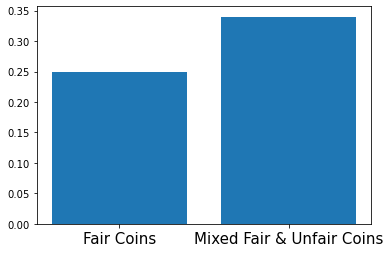

In [12]:
# Results, comparing the two relative frequencies, in a simple bar chart

plt.bar(x=['Fair Coins', 'Mixed Fair & Unfair Coins'], height= [fair_rf, medley_rf])
plt.xticks(size=15)
plt.show()

## Scenario 2

In [13]:
# Create a fair die (with six sides)

fair_die = Die(['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6'])
fair_die.show_die()

,Faces,Weights
0,Side 1,1.0
1,Side 2,1.0
2,Side 3,1.0
3,Side 4,1.0
4,Side 5,1.0
5,Side 6,1.0


In [14]:
# Create an unfair die (with six sides), biased towards Side 6

unfair_die1 = Die(['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6'])
unfair_die1.change_weight('Side 6', 5)
unfair_die1.show_die()

,Faces,Weights
0,Side 1,1.0
1,Side 2,1.0
2,Side 3,1.0
3,Side 4,1.0
4,Side 5,1.0
5,Side 6,5.0


In [15]:
# Create an unfair die (with six sides), biased towards Side 1

unfair_die2 = Die(['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6'])
unfair_die2.change_weight('Side 1', 5)
unfair_die2.show_die()

,Faces,Weights
0,Side 1,5.0
1,Side 2,1.0
2,Side 3,1.0
3,Side 4,1.0
4,Side 5,1.0
5,Side 6,1.0


In [16]:
# Play a game of 10000 rolls with 5 fair dice

fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game.play(10000)
fair_ana = Analyzer(fair_game)
fair_ana.jackpot()

6

In [17]:
# Fair: Determine the relative frequency of jackpots & compute relative frequency as the number of jackpots over the total number of rolls

fair_rf = (fair_ana.jackpot()) / 10000
print(fair_rf*100,  '%')

0.06 %


In [19]:
# Play a game of 10,000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice

unfair_game = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
unfair_game.play(10000)
unfair_ana = Analyzer(unfair_game)
unfair_ana.jackpot()

11

In [20]:
# Unfair: Determine the relative frequency of jackpots & compute relative frequency as the number of jackpots over the total number of rolls

unfair_rf = (unfair_ana.jackpot()) / 10000
print(unfair_rf*100,  '%')

0.11 %


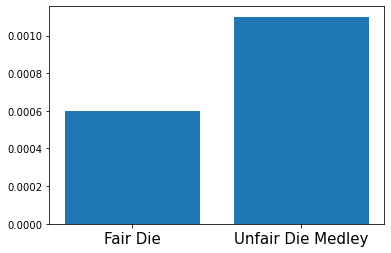

In [21]:
# Compare the relative frequencies 

plt.bar(x=['Fair Die', 'Unfair Die Medley'], height= [fair_rf, unfair_rf])
plt.xticks(size=15)
plt.show()

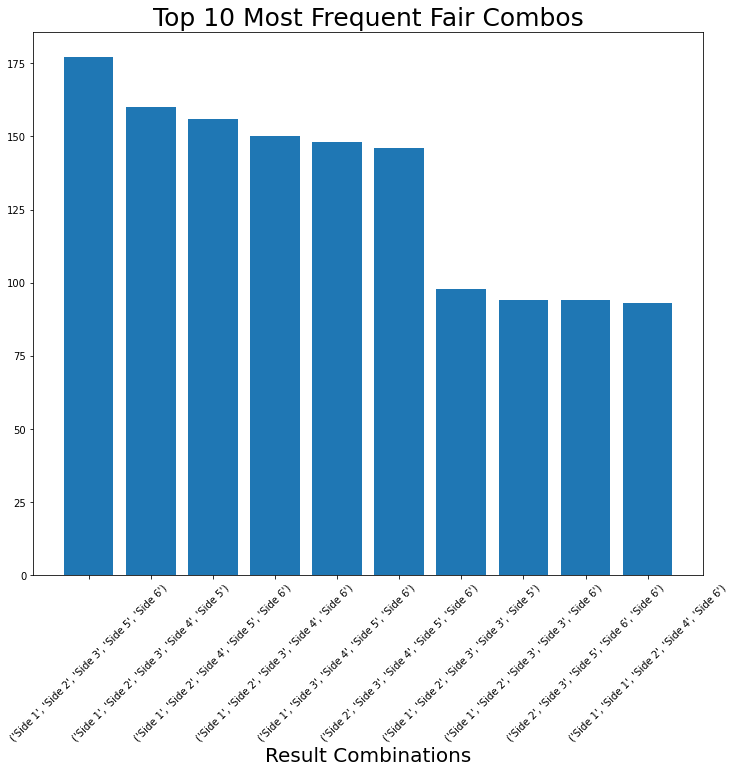

In [22]:
# Computes the 10 most frequent combinations of faces for the fair game

plt.figure(figsize=[12,10])

frequent_combo = fair_ana.combo()[0:10]
plt.bar(["".join(str(tup)) for tup in frequent_combo.index.tolist()], frequent_combo['size'].to_list());
plt.xticks(rotation=45, size=10)
plt.xlabel("Result Combinations", fontsize = 20)
plt.title('Top 10 Most Frequent Fair Combos', fontsize = 25)
plt.show()

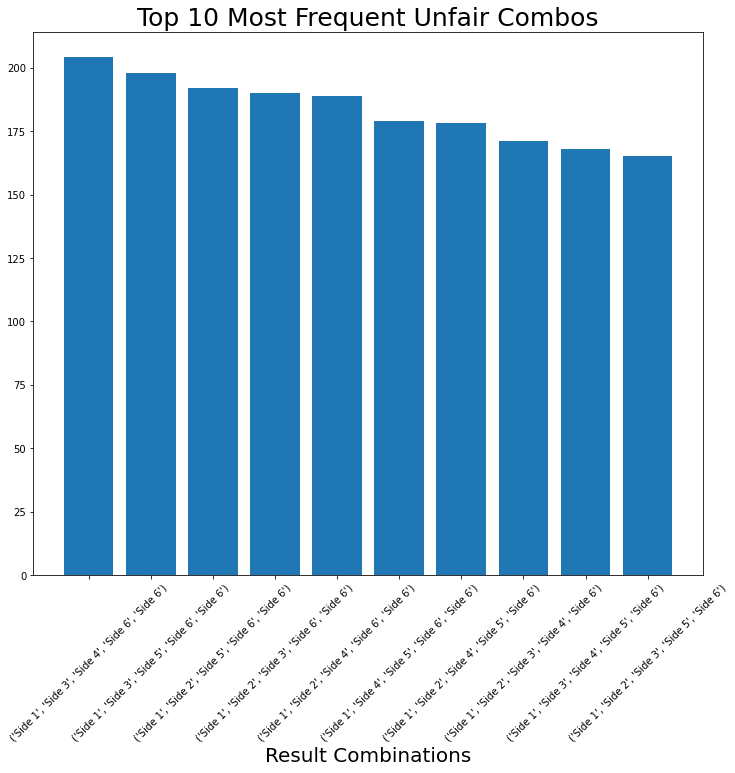

In [23]:
# Computes the 10 most frequent combinations of faces for the unfair game 

plt.figure(figsize=[12,10])

frequent_combo = unfair_ana.combo()[0:10]
plt.bar(["".join(str(tup)) for tup in frequent_combo.index.tolist()], frequent_combo['size'].to_list());
plt.xticks(rotation=45, size=10)
plt.xlabel("Result Combinations", fontsize = 20)
plt.title('Top 10 Most Frequent Unfair Combos', fontsize = 25)
plt.show()

## Scenario 3

In [24]:
# Create a "die" of letters from a to z 

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

alpha = Die(letters)

In [25]:
# Denote the weights based on their frequency of usage

alpha.change_weight('A', 8.4966)
alpha.change_weight('B', 2.0720)
alpha.change_weight('C', 4.5388)
alpha.change_weight('D', 3.3844)
alpha.change_weight('E', 11.1607)
alpha.change_weight('F', 1.8121)
alpha.change_weight('G', 2.4705)
alpha.change_weight('H' ,3.0034)
alpha.change_weight('I', 7.5448)
alpha.change_weight('J', 0.1965)
alpha.change_weight('K', 1.1016)
alpha.change_weight('L', 5.4893)
alpha.change_weight('M', 3.0129)
alpha.change_weight('N', 6.6544)
alpha.change_weight('O', 7.1635)
alpha.change_weight('P', 3.1671)
alpha.change_weight('Q', 0.1962)
alpha.change_weight('R', 7.5809)
alpha.change_weight('S', 5.7351)
alpha.change_weight('T', 6.9509)
alpha.change_weight('U', 3.6308)
alpha.change_weight('V', 1.0074)
alpha.change_weight('W', 1.2899)
alpha.change_weight('X', 0.2902)
alpha.change_weight('Y', 1.7779)
alpha.change_weight('Z', 0.2722)

In [26]:
# See what it looks like 

alpha.show_die()

,Faces,Weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


In [28]:
# Play a game involving 5 of these dice with 1000 rolls

words = Game([alpha, alpha, alpha, alpha, alpha])
words.play(1000)
word_ana = Analyzer(words)

In [29]:
# Goal: find english words with the combination of letters

lists = words.show_results().values #Make a list of the combinations
word_df = pd.DataFrame(lists, columns = [' ', ' ', ' ', ' ', ' '])
word_df

,,,,,
0,E,D,O,R,T
1,A,T,U,V,S
2,R,X,I,K,C
3,S,C,P,O,S
4,V,R,A,N,I
...,...,...,...,...,...
995,U,I,T,N,R
996,T,S,N,E,T
997,N,L,W,G,N
998,R,T,S,U,U


In [30]:
pd.set_option('display.max_rows', None)

In [32]:
# Lets see the first 100 results to estimate a relative frequency

word_df.head(100)

,,,,,
0,E,D,O,R,T
1,A,T,U,V,S
2,R,X,I,K,C
3,S,C,P,O,S
4,V,R,A,N,I
5,Y,R,I,O,E
6,D,C,R,P,C
7,C,L,L,E,O
8,B,B,O,E,M
9,B,M,Y,C,A


Looking through the first 100 results, I found "words" that resembled real words but were not quite an *actual* word. 

From the head of the results we can say the rough estimate for relative freuquency is likely less than $1\%$. 

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [44]:
!ls -lRF -o

total 920
-rw-r--r--  1 alseekford  133478 Jul 15 10:16 FinalProject.ipynb
drwxr-xr-x  8 alseekford     256 Jul 15 13:35 __pycache__/
-rw-r--r--@ 1 alseekford  169873 Jul 15 14:12 final-project-submission.ipynb
-rw-r--r--  1 alseekford  145975 Jul 15 13:43 mc_scenarios.ipynb
-rw-r--r--  1 alseekford    6821 Jul 15 13:13 montecarlo.py
-rw-r--r--  1 alseekford    7149 Jul 15 14:05 montecarlo_test.py

./__pycache__:
total 120
-rw-r--r--  1 alseekford  6269 Jul 15 09:03 montecarlo.cpython-38.pyc
-rw-r--r--  1 alseekford  9465 Jul 15 11:23 montecarlo2.cpython-38.pyc
-rw-r--r--  1 alseekford  7710 Jul 15 11:38 montecarlo3.cpython-38.pyc
-rw-r--r--  1 alseekford  9463 Jul 15 12:11 montecarlo4.cpython-38.pyc
-rw-r--r--  1 alseekford  8464 Jul 15 12:14 montecarlo5m.cpython-38.pyc
-rw-r--r--  1 alseekford  6685 Jul 15 13:35 montecarlo6j.cpython-38.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [46]:
# Installation commands
!pip install -e .

ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /Users/alseekford/5100/final
